# How are in-demand skills trending for Data Scientists?

original exploration-[text](<../2_advanced/12_investigating_trending _skills.ipynb>) (2_advanced\12_investigating_trending _skills.ipynb)

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df[["job_title" , "job_title_short"]]

,job_title,job_title_short
0,Senior Clinical Data Engineer / Principal Clin...,Senior Data Engineer
1,Data Analyst,Data Analyst
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",Data Engineer
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,Data Engineer
4,Data Engineer- Sr Jobs,Data Engineer
...,...,...
785736,DevOps Engineer,Software Engineer
785737,CRM Data Analyst,Data Analyst
785738,Commercial Analyst - Start Now,Business Analyst
785739,"Principal Associate, Data Engineer (Remote-Eli...",Data Engineer


## group the skills by month

In [5]:
## Skill count per month for data Scientists
df_DS_IND = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'India')].copy()

df_DS_IND['job_posted_month_no'] = df_DS_IND['job_posted_date'].dt.month

# Explode job_skills column
df_DS_IND_explode = df_DS_IND.explode('job_skills')

## pivot table in prep for plotting

In [6]:
df_DS_IND_pivot =df_DS_IND_explode.pivot_table(index ="job_posted_month_no" , columns= "job_skills" , aggfunc="size" , fill_value=0)
df_DS_IND_pivot

job_skills,airflow,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,vue.js,watson,webex,windows,wire,word,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,31,21,11,0,5,0,1,0,3,0,...,0,1,1,5,1,15,0,30,3,2
2,19,12,5,0,3,0,2,0,0,1,...,0,0,0,5,0,7,1,15,1,3
3,26,13,2,0,4,0,0,1,0,6,...,1,0,0,5,0,10,0,20,0,4
4,25,18,7,0,0,0,0,0,0,2,...,2,0,0,4,0,9,0,18,0,4
5,22,22,6,0,0,0,0,0,2,1,...,1,0,0,2,0,7,0,21,0,3
6,31,20,8,0,2,0,2,1,0,1,...,1,0,0,5,0,11,0,22,1,1
7,25,36,6,0,1,4,0,0,0,2,...,0,1,0,3,0,7,0,31,2,1
8,41,31,4,0,0,1,0,0,0,0,...,0,0,0,2,0,2,0,28,0,4
9,18,19,5,1,0,0,0,1,0,0,...,2,2,0,0,0,3,1,25,1,2


In [14]:
# Add a "Total" row
df_DS_IND_pivot.loc["Total"] = df_DS_IND_pivot.sum()

# Transpose, sort by "Total", and transpose back
df_DS_IND_pivot = df_DS_IND_pivot.T.sort_values(by="Total", ascending=False).T 

#  here .T is used for transposing the dataset so that we can put total as a column in the formula and then at the end again we transposed the
#  data to get the original data
df_DS_IND_pivot = df_DS_IND_pivot.drop("Total")

df_DS_IND_pivot


job_skills,python,sql,r,aws,tableau,spark,tensorflow,azure,pytorch,hadoop,...,fedora,delphi,next.js,redhat,symphony,mlpack,codecommit,cobol,clickup,ringcentral
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,970,703,469,269,248,239,238,218,140,194,...,0,0,0,0,0,0,0,0,0,0
2,608,425,285,149,164,154,147,120,112,121,...,0,0,0,0,0,0,0,0,0,0
3,728,520,341,186,207,194,158,145,127,145,...,0,0,0,0,1,0,0,1,0,0
4,645,465,317,192,183,181,172,142,130,132,...,0,1,0,0,0,0,1,0,0,0
5,602,411,247,188,169,140,126,139,103,95,...,0,0,0,0,0,1,0,0,0,1
6,842,561,388,218,192,212,212,164,158,155,...,0,0,0,0,0,0,0,0,0,0
7,779,590,384,196,218,215,198,178,152,167,...,1,0,0,0,0,0,0,0,0,0
8,794,563,394,222,239,241,213,190,156,176,...,0,0,0,0,0,0,0,0,1,0
9,682,439,314,195,167,151,187,187,148,124,...,0,0,0,0,0,0,0,0,0,0


## Plot the Monthly Skill Counts

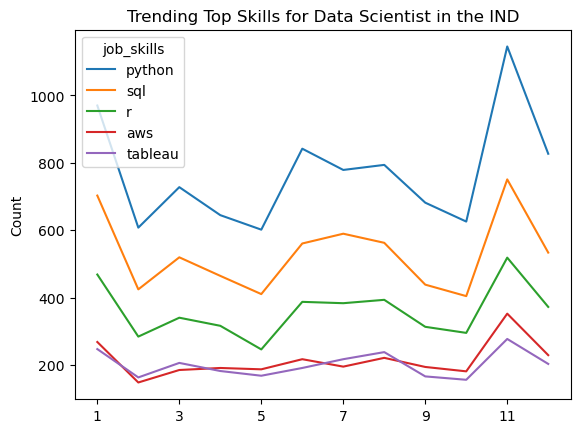

In [15]:
df_DS_IND_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Scientist in the IND')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

above graph is good but we would love to see the likelihood of a skill wrt month name and not numbers
## Calculate Percentage of Total Jobs

In [16]:
DA_totals = df_DS_IND.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     1444
2      932
3     1005
4      946
5      837
6     1129
7     1123
8     1157
9      984
10     902
11    1614
12    1206
dtype: int64

In [18]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DS_IND_percent = df_DS_IND_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DS_IND_percent = df_DS_IND_percent.reset_index()
df_DS_IND_percent['job_posted_month'] = df_DS_IND_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_IND_percent = df_DS_IND_percent.set_index('job_posted_month')
df_DS_IND_percent = df_DS_IND_percent.drop(columns='job_posted_month_no')

df_DS_IND_percent

job_skills,python,sql,r,aws,tableau,spark,tensorflow,azure,pytorch,hadoop,...,fedora,delphi,next.js,redhat,symphony,mlpack,codecommit,cobol,clickup,ringcentral
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,67.174515,48.684211,32.479224,18.628809,17.174515,16.551247,16.481994,15.096953,9.695291,13.434903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Feb,65.236052,45.600858,30.579399,15.987124,17.596567,16.523605,15.772532,12.875536,12.017167,12.982833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Mar,72.437811,51.741294,33.930348,18.507463,20.597015,19.303483,15.721393,14.427861,12.636816,14.427861,...,0.000000,0.000000,0.000000,0.000000,0.099502,0.000000,0.000000,0.099502,0.00000,0.000000
Apr,68.181818,49.154334,33.509514,20.295983,19.344609,19.133192,18.181818,15.010571,13.742072,13.953488,...,0.000000,0.105708,0.000000,0.000000,0.000000,0.000000,0.105708,0.000000,0.00000,0.000000
May,71.923536,49.103943,29.510155,22.461171,20.191159,16.726404,15.053763,16.606930,12.305854,11.350060,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.119474,0.000000,0.000000,0.00000,0.119474
Jun,74.579274,49.689991,34.366696,19.309123,17.006200,18.777679,18.777679,14.526129,13.994686,13.728964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Jul,69.367765,52.537845,34.194123,17.453250,19.412289,19.145147,17.631345,15.850401,13.535174,14.870882,...,0.089047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Aug,68.625756,48.660328,34.053587,19.187554,20.656871,20.829732,18.409680,16.421780,13.483146,15.211755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.08643,0.000000
Sep,69.308943,44.613821,31.910569,19.817073,16.971545,15.345528,19.004065,19.004065,15.040650,12.601626,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


## plot monthly skill demand

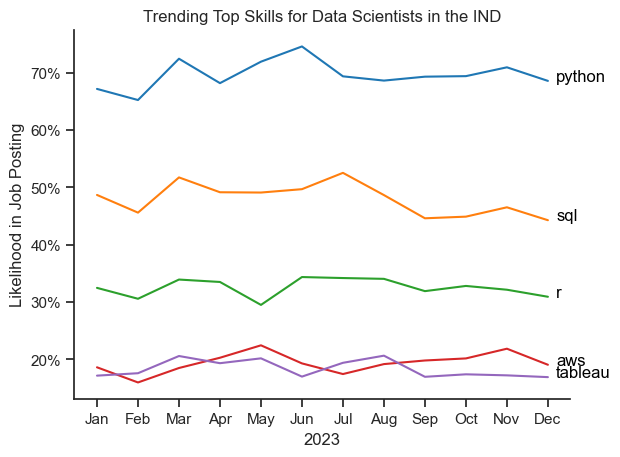

In [21]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DS_IND_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Scientists in the IND')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()